In [1]:
pip install kneed

In [ ]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 4.9 MB/s eta 0:00:00


In [ ]:
import sys
import spotipy
import yaml
import spotipy.util as util
from pprint import pprint
import json
import argparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from kneed import KneeLocator
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set()

In [ ]:
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import silhouette_visualizer


In [ ]:
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


In [ ]:
client_id = "68373d16a1b74732be11557fa7d7845d"
client_secret = "298a443f22bc450fab46672fcd3bc746"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
name = ["Pitbull","Enrique Iglesias","Akon","Ed Sheeran","Justin Bieber","Lady Gaga","Taylor Swift","Katy Perry","Rihana","Christina Aguilera"]
result = sp.search(name)
result['tracks']['items'][1]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/0TnOYISbd1XYRBk9myaseg'},
  'href': 'https://api.spotify.com/v1/artists/0TnOYISbd1XYRBk9myaseg',
  'id': '0TnOYISbd1XYRBk9myaseg',
  'name': 'Pitbull',
  'type': 'artist',
  'uri': 'spotify:artist:0TnOYISbd1XYRBk9myaseg'}]

In [ ]:
artists_uris = result['tracks']['items'][0]['artists'][0]['uri']
#Pull all of the artist's albums
artist_albums = sp.artist_albums(artists_uris, album_type='album')
#Store artist's albums' names' and uris in separate lists
artist_album_names = []
artist_album_uris = []
for i in range(len(artist_albums['items'])):
    artist_album_names.append(artist_albums['items'][i]['name'])
    artist_album_uris.append(artist_albums['items'][i]['uri'])
artist_album_names
artist_album_uris

['spotify:album:1l86t4bTNT2j1X0ZBCIv6R',
 'spotify:album:6nCJAxRvXmPkPiZo8Vh5ZG',
 'spotify:album:6ZSNnOY2ESMNoVQ5DdvHrj',
 'spotify:album:4jtKPpBQ5eneMwEI94f5Y0',
 'spotify:album:5PZWGWwRwA0PJCET9BwBAm',
 'spotify:album:4EUf4YyNjuXypWY6W5wEDm',
 'spotify:album:2USiuZqEAyfOcKmcujg4hs',
 'spotify:album:2F7tejLHzTqFq2XLol9ZGy',
 'spotify:album:4rG0MhkU6UojACJxkMHIXB',
 'spotify:album:3K3wPSsFq3jt0tgZXerYma',
 'spotify:album:1q23hvi1qvoADt2fh7FO7P',
 'spotify:album:0kv3Rm7PODqJBQaVJiezuB',
 'spotify:album:00zN65JStpVnpJn9ckMsQI',
 'spotify:album:6ODOJvYpaQ3p0O6Agrlt4B',
 'spotify:album:7m9AYxqeFPagkaqlg6WE0J',
 'spotify:album:69bXbGpsjbLtygqiiaXIqf',
 'spotify:album:7rOcmdW8dWxlScy6AUgjI8',
 'spotify:album:0gayfOCt1DJX4j8MOhv7we',
 'spotify:album:76N6imyjQ9h5p2NzakHT32']

In [ ]:
def album_songs(uri):
    album = uri
    spotify_albums[album] = {}
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = []
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['artist'] = []
    spotify_albums[album]['uri'] = []
    #pull data on album tracks
    tracks = sp.album_tracks(album)
    for n in range(len(tracks['items'])):
        spotify_albums[album]['album'].append(artist_album_names[album_count])
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['artist'].append(tracks['items'][n]['artists'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [ ]:
spotify_albums = {}
album_count = 0
for i in artist_album_uris: #each album
    album_songs(i)
    print(str(artist_album_names[album_count]) + " album songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Trackhouse album songs has been added to spotify_albums dictionary
Libertad 548 album songs has been added to spotify_albums dictionary
Gotti (Original Motion Picture Soundtrack) album songs has been added to spotify_albums dictionary
Climate Change album songs has been added to spotify_albums dictionary
Dale album songs has been added to spotify_albums dictionary
Globalization album songs has been added to spotify_albums dictionary
Global Warming (Deluxe Version) album songs has been added to spotify_albums dictionary
Global Warming: Meltdown (Deluxe Version) album songs has been added to spotify_albums dictionary
Planet Pit (Deluxe Version) album songs has been added to spotify_albums dictionary
Planet Pit album songs has been added to spotify_albums dictionary
Armando (Deluxe) album songs has been added to spotify_albums dictionary
I Am Armando - Armando Reloaded album songs has been added to spotify_albums dictionary
Pitbull Starring In Rebelution album songs has been added to spot

In [ ]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []


    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)

        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [ ]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 18.290802478790283 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 34.85462689399719 seconds
15 playlists completed
Loop #: 15
Elapsed Time: 53.36113953590393 seconds


In [ ]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['name'] = []
dic_df['artist']=[]
dic_df['id']=[]
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums:
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
len(dic_df['album'])

293

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(dic_df)

In [ ]:
df=df.drop(['album','track_number','name','artist','id','uri','popularity'],axis=1,inplace=False)

In [ ]:
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.06720,0.762,0.736,0.000000,0.869,-4.819,0.0636,100.101,0.566
1,0.00214,0.893,0.731,0.000034,0.246,-7.869,0.0897,118.501,0.318
2,0.02130,0.709,0.963,0.004200,0.128,-2.906,0.1050,130.071,0.700
3,0.00139,0.590,0.880,0.000000,0.201,-3.060,0.0724,127.990,0.585
4,0.05210,0.868,0.780,0.000002,0.105,-3.920,0.0654,114.056,0.606


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8
0,-0.349780,0.240949,0.095993,-0.249445,3.812265,0.475925,-0.720011,-0.942670,-0.194457
1,-0.648994,1.073311,0.071311,-0.249261,0.170447,-0.381703,-0.563661,-0.051208,-1.277872
2,-0.560876,-0.095807,1.216541,-0.226825,-0.519336,1.013841,-0.472007,0.509347,0.390937
3,-0.652443,-0.851922,0.806825,-0.249445,-0.092606,0.970538,-0.667296,0.408525,-0.111453
4,-0.419225,0.914463,0.313191,-0.249437,-0.653785,0.728715,-0.709229,-0.266564,-0.019712


In [ ]:
pca = PCA()

In [ ]:
X_r = pca.fit(X).transform(X)
print('\nEigenvalues \n%s' %pd.DataFrame(pca.explained_variance_).T)
print('Eigenvectors \n%s' %pd.DataFrame(pca.components_).T.head())


Eigenvalues 
          0         1         2         3         4         5         6  \
0  3.784944  1.547603  1.021905  0.933951  0.569889  0.527205  0.313835   

          7         8  
0  0.194566  0.136925  
Eigenvectors 
          0         1         2         3         4         5         6  \
0  0.403136  0.272639  0.036968  0.073743 -0.347091 -0.177366 -0.732970   
1 -0.362520  0.329556 -0.061077  0.091059  0.519272 -0.445816 -0.348052   
2 -0.431719 -0.247056 -0.035635 -0.093218 -0.362172  0.225411 -0.295268   
3  0.442664 -0.236387 -0.020783 -0.032298 -0.243562 -0.137673  0.014706   
4 -0.074501  0.015962  0.892991 -0.395407 -0.039313 -0.194105  0.032900   

          7         8  
0 -0.254937 -0.046655  
1  0.377395  0.126446  
2  0.081122  0.683286  
3  0.817310  0.014367  
4  0.006906  0.007921  


In [ ]:
!pip install mplcyberpunk


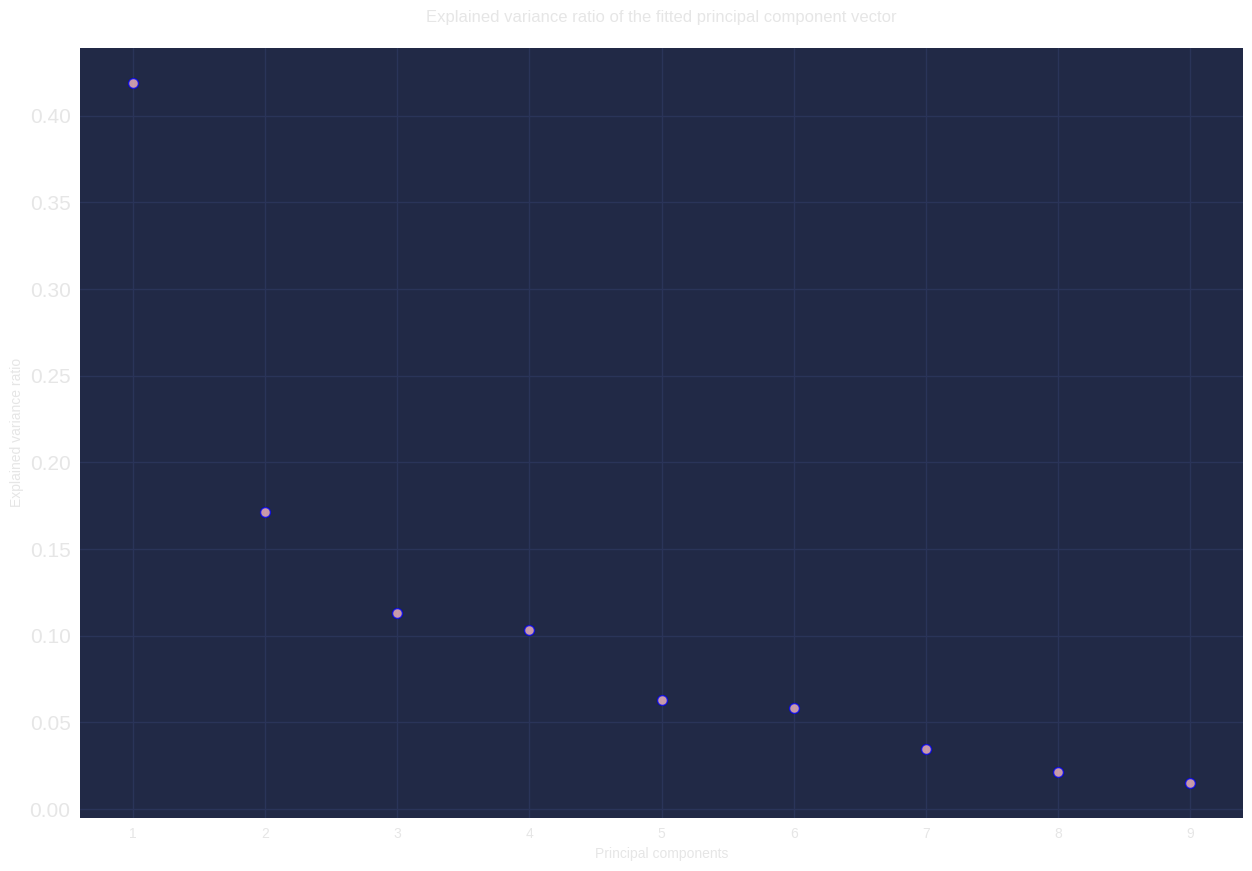

In [ ]:
import matplotlib.pyplot as plt
import mplcyberpunk
plt.figure(figsize=(15,10))
plt.style.use("cyberpunk")
plt.scatter(x=[i+1 for i in range(len(pca.explained_variance_ratio_))],y=pca.explained_variance_ratio_,s=50, alpha=0.75,c='pink',edgecolor='blue')
plt.grid(True)
plt.title("Explained variance ratio of the fitted principal component vector\n",fontsize=12)
plt.xlabel("Principal components",fontsize=10)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))],fontsize=10)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=10)
plt.show()

In [ ]:
exp_var_ratio=pca.explained_variance_ratio_
exp_var_ratio

array([0.41911396, 0.17136899, 0.11315745, 0.10341812, 0.0631049 ,
       0.05837842, 0.03475151, 0.0215447 , 0.01516196])

In [ ]:
cum_explaiend_var = exp_var_ratio.cumsum()
cum_explaiend_var

array([0.41911396, 0.59048295, 0.7036404 , 0.80705852, 0.87016342,
       0.92854184, 0.96329334, 0.98483804, 1.        ])

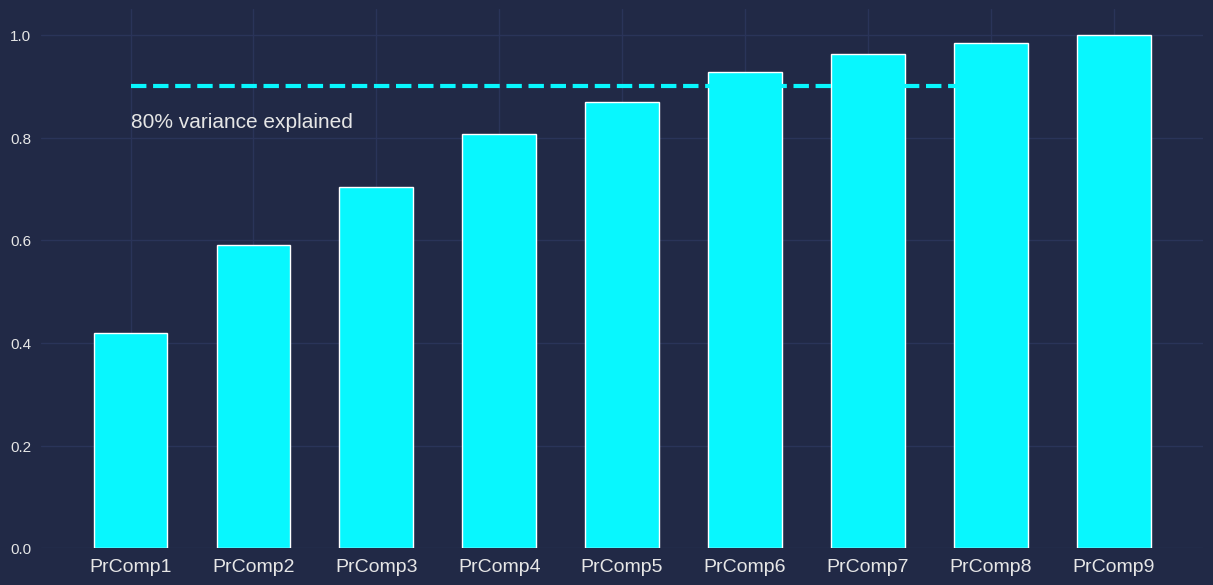

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=['PrComp'+str(i) for i in range(1,10)],height=cum_explaiend_var,width=0.6)
plt.xticks(fontsize=14)
plt.hlines(y=0.9,xmin='PrComp1',xmax='PrComp8',linestyles='dashed',lw=3)
plt.text(x='PrComp1',y=0.82,s="80% variance explained",fontsize=15)
plt.show()